<a href="https://colab.research.google.com/github/sha863/MSc-Dissertation-2022/blob/main/Spam_email_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
pip install nltk

In [119]:
import numpy as np
import pandas as pd
import re
import string
import math
import seaborn as sns
from google.colab import data_table
data_table.enable_dataframe_formatter()


[Source of data](https://www.kaggle.com/team-ai/spam-text-message-classification)

In [120]:
data = pd.read_csv('spam.csv',encoding='latin-1')

In [121]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [122]:
data.describe(include="all")

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [124]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)
data.head()

(5572, 2)
(5169, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [125]:
data['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

# Text Preprocessing Techniques

## Lower case

In [126]:
data['text'] = data['text'].str.lower()

In [127]:
data.text[0]

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

##  Remove punctuations

In [128]:
data['text'] = data['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [129]:
data.text[0]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

##  Remove words and digits containing digits

In [130]:
#remove words and digits
data['text'] = data['text'].apply(lambda x: re.sub('\w*\d\w*','',x))

In [131]:
data.text[2]

'free entry in  a wkly comp to win fa cup final tkts  may  text fa to  to receive entry questionstd txt ratetcs apply '

## Remove Stopwords

In [132]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [133]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
data['text'] = data['text'].apply(lambda x: remove_stopwords(x))

In [134]:
data.text[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

## Stemming

In [135]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
data["text"] = data["text"].apply(lambda x: stem_words(x))

In [136]:
data.text[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

## Lemmatization

In [137]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
data["text"] = data["text"].apply(lambda text: lemmatize_words(text))

In [138]:
data.head()

,label,text
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt may ...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though


## Remove Extra Spaces

In [139]:
data["text"] = data["text"].apply(lambda x: re.sub(' +', ' ', x))

In [140]:
data.text[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [141]:
data.head()

,label,text
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt may ...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though


# Modelling

In [142]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB



from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


In [143]:
data.label.value_counts(normalize=True)*100

ham     87.366996
spam    12.633004
Name: label, dtype: float64

## Support Vector Classifier

Linear SVC using counting word occurence   
accuracy: 98.07%


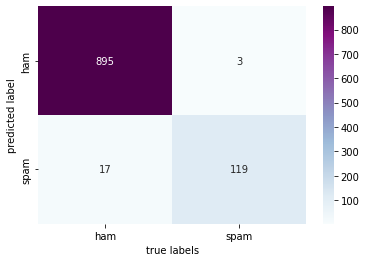



		Classification report

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       898
        spam       0.98      0.88      0.92       136

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034


------------------------------------------------------------------------------------------

Linear SVC using normalized count occurence   
accuracy: 97.68%


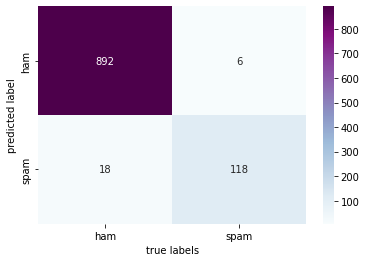



		Classification report

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       898
        spam       0.95      0.87      0.91       136

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034


--------------------------------------------------------------------------------------------

Linear SVC using TFIDF   
accuracy: 97.68%


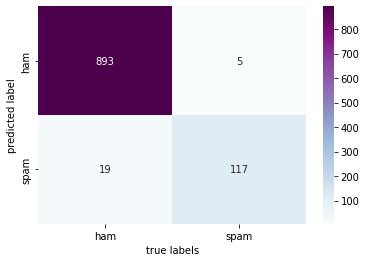



		Classification report

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       898
        spam       0.96      0.86      0.91       136

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034


------------------------------------------------------------------------------------------

Linear SVC Classifier using counting word occurence with 2-grams   
accuracy: 94.1%


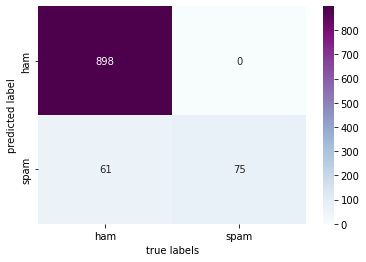



		Classification report

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       898
        spam       1.00      0.55      0.71       136

    accuracy                           0.94      1034
   macro avg       0.97      0.78      0.84      1034
weighted avg       0.94      0.94      0.93      1034


------------------------------------------------------------------------------------------



In [144]:
print('\033[1mLinear SVC using counting word occurence   \033[0m')

# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer()), # Converts text into numeric format to feed in models
                 ('model', LinearSVC())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n------------------------------------------------------------------------------------------\n")

print('\033[1mLinear SVC using normalized count occurence   \033[0m')
# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', TfidfVectorizer(use_idf=False, norm="l2")), # Converts text into numeric format to feed in models
                 ('model', LinearSVC())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n--------------------------------------------------------------------------------------------\n")

print('\033[1mLinear SVC using TFIDF   \033[0m')
# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer()), # Converts text into numeric format to feed in models
                 ('tfidf', TfidfTransformer()), # Technique to extract features from data
                 ('model', LinearSVC())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n------------------------------------------------------------------------------------------\n")
print('\033[1mLinear SVC Classifier using counting word occurence with 2-grams   \033[0m')

# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer(ngram_range=(2,2))), # Converts text into numeric format to feed in models
                 ('model', LinearSVC())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n------------------------------------------------------------------------------------------\n")


## Naive Bayes Classifier

Naive Bayes Classifier using counting word occurence   
accuracy: 97.49%


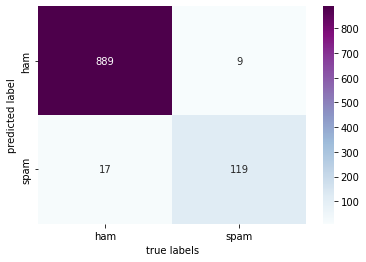



		Classification report

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       898
        spam       0.93      0.88      0.90       136

    accuracy                           0.97      1034
   macro avg       0.96      0.93      0.94      1034
weighted avg       0.97      0.97      0.97      1034


------------------------------------------------------------------------------------------

Naive Bayes Classifier using normalized count occurence   
accuracy: 95.26%


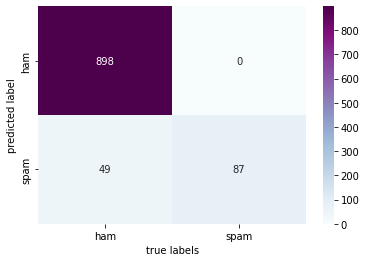



		Classification report

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       898
        spam       1.00      0.64      0.78       136

    accuracy                           0.95      1034
   macro avg       0.97      0.82      0.88      1034
weighted avg       0.96      0.95      0.95      1034


--------------------------------------------------------------------------------------------

Naive Bayes Classifier using TFIDF   
accuracy: 95.26%


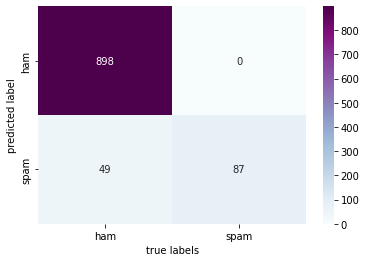



		Classification report

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       898
        spam       1.00      0.64      0.78       136

    accuracy                           0.95      1034
   macro avg       0.97      0.82      0.88      1034
weighted avg       0.96      0.95      0.95      1034


--------------------------------------------------------------------------------------------

Naive Bayes Classifier using counting word occurence with 2-gram   
accuracy: 96.91%


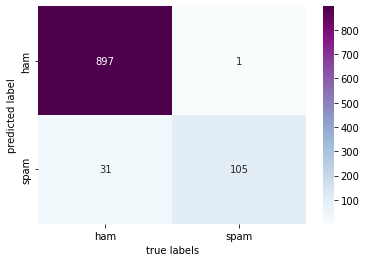



		Classification report

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       898
        spam       0.99      0.77      0.87       136

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034


------------------------------------------------------------------------------------------



In [145]:
print('\033[1mNaive Bayes Classifier using counting word occurence   \033[0m')

# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer()), # Converts text into numeric format to feed in models
                 ('model', MultinomialNB())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n------------------------------------------------------------------------------------------\n")

print('\033[1mNaive Bayes Classifier using normalized count occurence   \033[0m')
# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', TfidfVectorizer(use_idf=False, norm="l2")), # Converts text into numeric format to feed in models
                 ('model', MultinomialNB())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n--------------------------------------------------------------------------------------------\n")

print('\033[1mNaive Bayes Classifier using TFIDF   \033[0m')
# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer()), # Converts text into numeric format to feed in models
                 ('tfidf', TfidfTransformer()), # Technique to extract features from data
                 ('model', MultinomialNB())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))

print("\n--------------------------------------------------------------------------------------------\n")

print('\033[1mNaive Bayes Classifier using counting word occurence with 2-gram   \033[0m')

# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer(ngram_range=(2,2))), # Converts text into numeric format to feed in models
                 ('model', MultinomialNB())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n------------------------------------------------------------------------------------------\n")



## Logistic Regression Classifier

Logistic Regression Classifier using counting word occurence   
accuracy: 97.78%


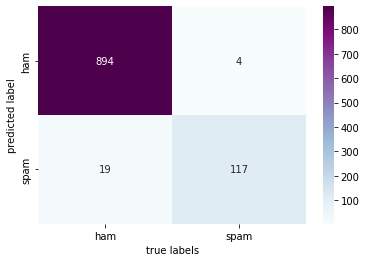



		Classification report

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       898
        spam       0.97      0.86      0.91       136

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034


------------------------------------------------------------------------------------------

Logistic Regression Classifier using normalized count occurence   
accuracy: 96.42%


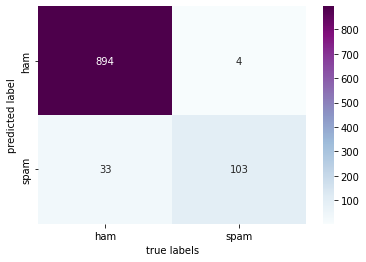



		Classification report

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       898
        spam       0.96      0.76      0.85       136

    accuracy                           0.96      1034
   macro avg       0.96      0.88      0.91      1034
weighted avg       0.96      0.96      0.96      1034


--------------------------------------------------------------------------------------------

Logistic Regression Classifier Classifier using TFIDF   
accuracy: 95.84%


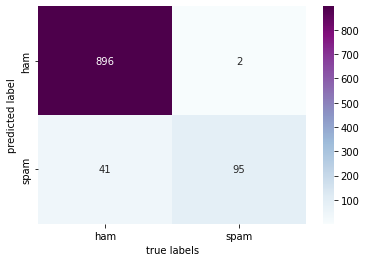



		Classification report

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       898
        spam       0.98      0.70      0.82       136

    accuracy                           0.96      1034
   macro avg       0.97      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034


------------------------------------------------------------------------------------------

Logistic Regression Classifier using counting word occurence with 2-grams   
accuracy: 92.55%


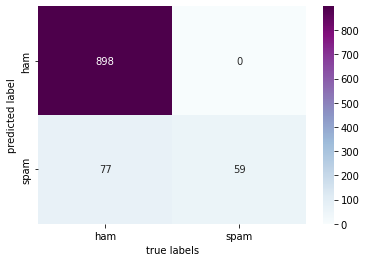



		Classification report

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       898
        spam       1.00      0.43      0.61       136

    accuracy                           0.93      1034
   macro avg       0.96      0.72      0.78      1034
weighted avg       0.93      0.93      0.91      1034


------------------------------------------------------------------------------------------



In [146]:
print('\033[1mLogistic Regression Classifier using counting word occurence   \033[0m')

# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer()), # Converts text into numeric format to feed in models
                  ('model', LogisticRegression())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n------------------------------------------------------------------------------------------\n")

print('\033[1mLogistic Regression Classifier using normalized count occurence   \033[0m')
# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', TfidfVectorizer(use_idf=False, norm="l2")), # Converts text into numeric format to feed in models
                  ('model', LogisticRegression())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n--------------------------------------------------------------------------------------------\n")

print('\033[1mLogistic Regression Classifier Classifier using TFIDF   \033[0m')
# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer()), # Converts text into numeric format to feed in models
                 ('tfidf', TfidfTransformer()), # Technique to extract features from data
                 ('model', LogisticRegression())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))

print("\n------------------------------------------------------------------------------------------\n")
print('\033[1mLogistic Regression Classifier using counting word occurence with 2-grams   \033[0m')

# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer(ngram_range=(2,2))), # Converts text into numeric format to feed in models
                ('model', LogisticRegression())]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n------------------------------------------------------------------------------------------\n")


## Decision Tree Classifier

Decision Tree Classifier using counting word occurence   
accuracy: 94.2%


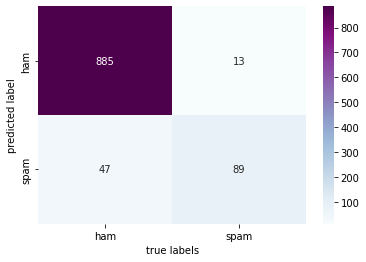



		Classification report

              precision    recall  f1-score   support

         ham       0.95      0.99      0.97       898
        spam       0.87      0.65      0.75       136

    accuracy                           0.94      1034
   macro avg       0.91      0.82      0.86      1034
weighted avg       0.94      0.94      0.94      1034


------------------------------------------------------------------------------------------

Decision Tree Classifier using normalized count occurence   
accuracy: 94.2%


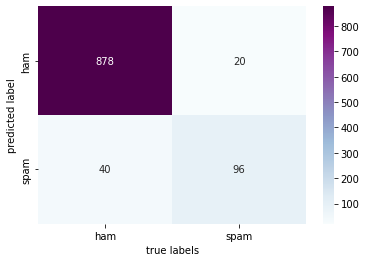



		Classification report

              precision    recall  f1-score   support

         ham       0.96      0.98      0.97       898
        spam       0.83      0.71      0.76       136

    accuracy                           0.94      1034
   macro avg       0.89      0.84      0.86      1034
weighted avg       0.94      0.94      0.94      1034


--------------------------------------------------------------------------------------------

Decision Tree Classifier using TFIDF   
accuracy: 94.39%


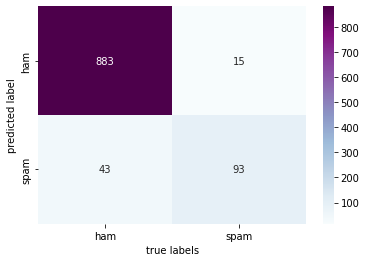



		Classification report

              precision    recall  f1-score   support

         ham       0.95      0.98      0.97       898
        spam       0.86      0.68      0.76       136

    accuracy                           0.94      1034
   macro avg       0.91      0.83      0.87      1034
weighted avg       0.94      0.94      0.94      1034


------------------------------------------------------------------------------------------

Decision Tree Classifier using counting word occurence with 2-grams   
accuracy: 89.46%


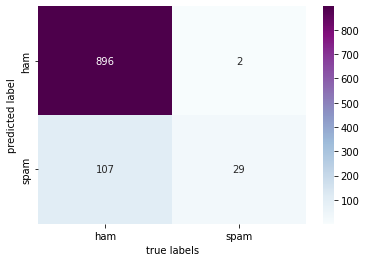



		Classification report

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       898
        spam       0.94      0.21      0.35       136

    accuracy                           0.89      1034
   macro avg       0.91      0.61      0.64      1034
weighted avg       0.90      0.89      0.86      1034


------------------------------------------------------------------------------------------



In [147]:
print('\033[1mDecision Tree Classifier using counting word occurence   \033[0m')

# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer()), # Converts text into numeric format to feed in models
                   ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=41))]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n------------------------------------------------------------------------------------------\n")

print('\033[1mDecision Tree Classifier using normalized count occurence   \033[0m')
# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', TfidfVectorizer(use_idf=False, norm="l2")), # Converts text into numeric format to feed in models
                   ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=41))]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n--------------------------------------------------------------------------------------------\n")

print('\033[1mDecision Tree Classifier using TFIDF   \033[0m')
# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer()), # Converts text into numeric format to feed in models
                 ('tfidf', TfidfTransformer()), # Technique to extract features from data
                  ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=41))]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))


print("\n------------------------------------------------------------------------------------------\n")
print('\033[1mDecision Tree Classifier using counting word occurence with 2-grams   \033[0m')

# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer(ngram_range=(2,2))), # Converts text into numeric format to feed in models
                ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=41))]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n------------------------------------------------------------------------------------------\n")



## KNN Classifier

KNN Classifier using counting word occurence   
accuracy: 91.01%


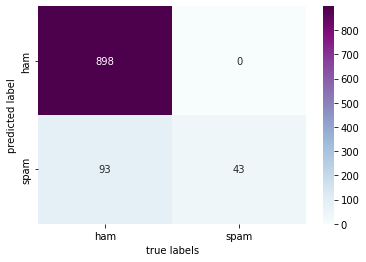



		Classification report

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       898
        spam       1.00      0.32      0.48       136

    accuracy                           0.91      1034
   macro avg       0.95      0.66      0.72      1034
weighted avg       0.92      0.91      0.89      1034


------------------------------------------------------------------------------------------

KNN Classifier using normalized count occurence   
accuracy: 91.49%


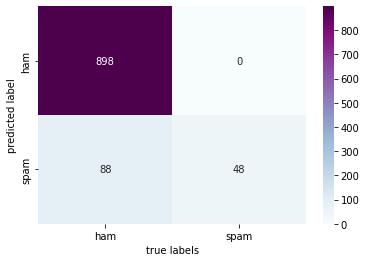



		Classification report

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       898
        spam       1.00      0.35      0.52       136

    accuracy                           0.91      1034
   macro avg       0.96      0.68      0.74      1034
weighted avg       0.92      0.91      0.90      1034


--------------------------------------------------------------------------------------------

KNN Classifier using TFIDF   
accuracy: 90.72%


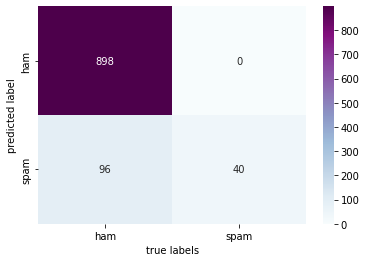



		Classification report

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       898
        spam       1.00      0.29      0.45       136

    accuracy                           0.91      1034
   macro avg       0.95      0.65      0.70      1034
weighted avg       0.92      0.91      0.88      1034


------------------------------------------------------------------------------------------

KNN Classifier using counting word occurence with 2-grams   
accuracy: 89.26%


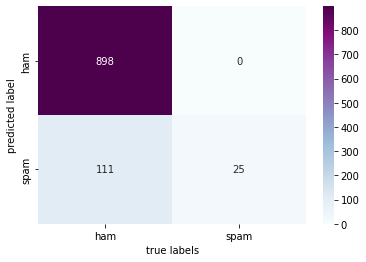



		Classification report

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       898
        spam       1.00      0.18      0.31       136

    accuracy                           0.89      1034
   macro avg       0.94      0.59      0.63      1034
weighted avg       0.90      0.89      0.86      1034


------------------------------------------------------------------------------------------



In [148]:
print('\033[1mKNN Classifier using counting word occurence   \033[0m')

# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer()), # Converts text into numeric format to feed in models
                   ('model', KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute'))]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n------------------------------------------------------------------------------------------\n")

print('\033[1mKNN Classifier using normalized count occurence   \033[0m')
# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', TfidfVectorizer(use_idf=False, norm="l2")), # Converts text into numeric format to feed in models
                   ('model', KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute'))]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n--------------------------------------------------------------------------------------------\n")

print('\033[1mKNN Classifier using TFIDF   \033[0m')
# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer()), # Converts text into numeric format to feed in models
                 ('tfidf', TfidfTransformer()), # Technique to extract features from data
                 ('model', KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute'))]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))

print("\n------------------------------------------------------------------------------------------\n")
print('\033[1mKNN Classifier using counting word occurence with 2-grams   \033[0m')

# Split Dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=41)

pipe = Pipeline([('vect', CountVectorizer(ngram_range=(2,2))), # Converts text into numeric format to feed in models
                ('model', KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute'))]) # Model Classifier

# Fitting of pipeline
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

x_axis_labels = ["ham", "spam"]
y_axis_labels = ["ham", "spam"] 

sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap='BuPu', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("true labels")
plt.ylabel("predicted label")

plt.show()
print("\n")
print("\t\tClassification report\n")
print(classification_report(y_test, prediction))
print("\n------------------------------------------------------------------------------------------\n")

